In [7]:
%load_ext autoreload
%autoreload 2

from BandPower import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


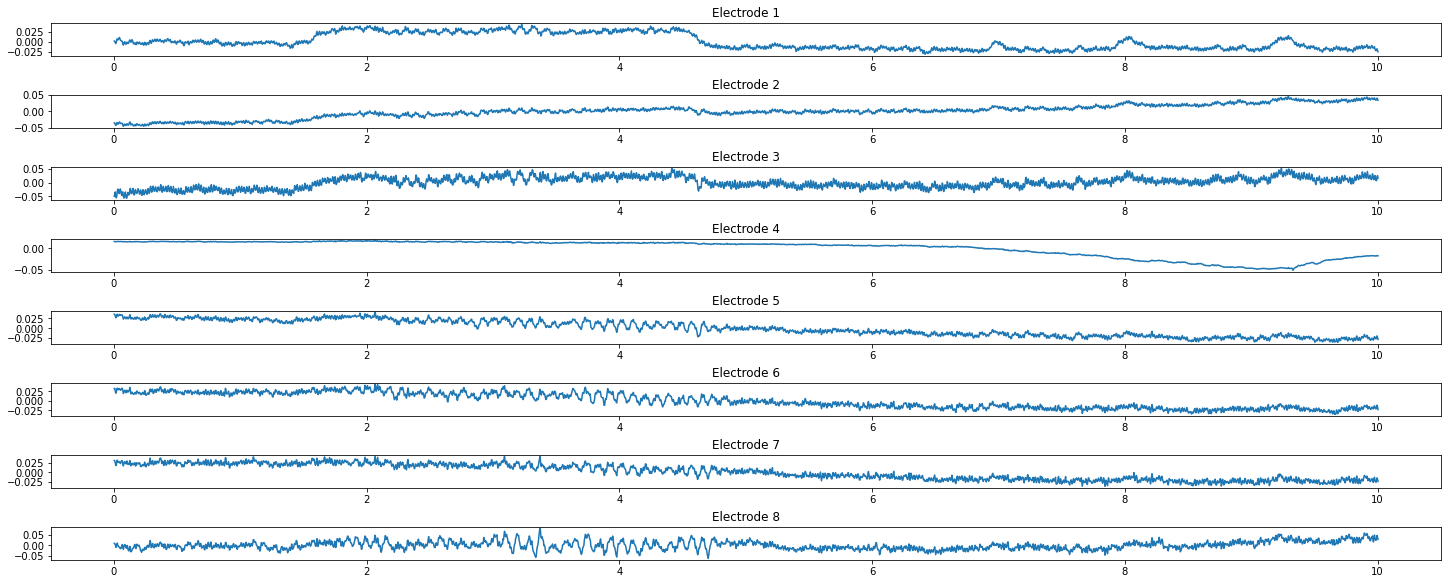

In [52]:
df = pd.read_csv("../DATA/subject_18/smell 1.csv")
time=np.array(df['time'])

fig, axs = plt.subplots(8,1, constrained_layout=True,figsize=(20,8))
for i in range(8):
    s = df['Electrode '+str(i+1)]
    s = centering_and_normalise(s)
    axs[i].plot(df['time'],s)
    axs[i].set_title('Electrode '+str(i+1))
plt.show()

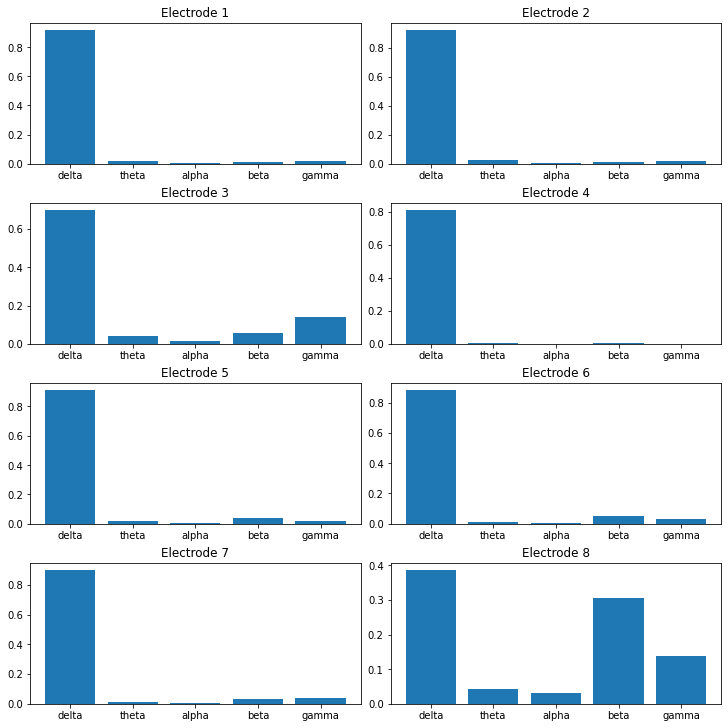

In [37]:
BPS = toBandPower(df)

E_original_s = []
fig, axs = plt.subplots(4, 2, constrained_layout=True,figsize=(10,10))
for i,elec in enumerate(BPS):
    E_original_s.append(energie(time,centering_and_normalise(df['Electrode '+str(i+1)])))
    E = []
    for cut_s in elec:
        E.append(energie(time,cut_s)/E_original_s[i])
    E=np.array(E)
    axs[i//2][i%2].bar(range(5),height = E,tick_label=['delta','theta','alpha','beta','gamma'])
    axs[i//2][i%2].set_title('Electrode '+str(i+1))
plt.show()
